In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.loadtxt('features.csv', delimiter=',')

print(data.shape)

(152, 1530)


In [129]:
data_info = pd.read_csv('data_info.csv',usecols=[0,1])
data_info = data_info.loc[:120]
data_filt = data_info.dropna()

labels = data_filt.values[:,1]
y = labels

dfX = pd.DataFrame(data)
subjects_list = data_filt['BASIC_INFO_ID'].unique().tolist()
sub_nums = [int(subject.split('-')[1]) for subject in subjects_list]
print(sub_nums)

arr = np.array(sub_nums)
existing_indices = arr - 1
dfXExisting = dfX.loc[existing_indices]
X = dfXExisting.values

X.shape,y.shape

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 34, 35, 36, 38, 39, 43, 44, 45, 46, 47, 49, 50, 52, 55, 56, 57, 58, 59, 60, 63, 64, 65, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 100, 101, 103, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 121, 123, 126, 127, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152]


((118, 1530), (118,))

In [130]:
X_aug = []
y_aug = []

X_aug.append(X)
y_aug.append(y)

for _ in range(10):
    noisex = np.random.normal(loc=0, scale=0.5, size=X.shape)
    noisey = np.random.normal(loc=0, scale=0.5, size=y.shape)
    X_aug.append(X + noisex)
    y_aug.append(y + noisey)

X_aug = np.concatenate(X_aug, axis=0)
y_aug = np.concatenate(y_aug, axis=0)

np.array(X_aug).shape,np.array(y_aug).shape

((1298, 1530), (1298,))

In [131]:
i = 100
X_aug[i+118]-X_aug[i], y_aug[i+118]-y_aug[i], np.mean(X_aug[i+118]-X_aug[i]), np.std(X_aug[i+118]-X_aug[i])

(array([-0.13517929, -0.07103321, -0.30744832, ..., -0.21434077,
        -0.89629843, -0.44408678]),
 0.17972299455004048,
 0.009514514494917947,
 0.5016727250618707)

In [132]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X_aug, y_aug, np.arange(X_aug.shape[0]), test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1038, 1530)
Testing set size: (260, 1530)


In [133]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [127]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
rf.feature_importances_

array([0.0001652 , 0.00015048, 0.00028201, ..., 0.00067157, 0.00030785,
       0.00031027])

<BarContainer object of 1530 artists>

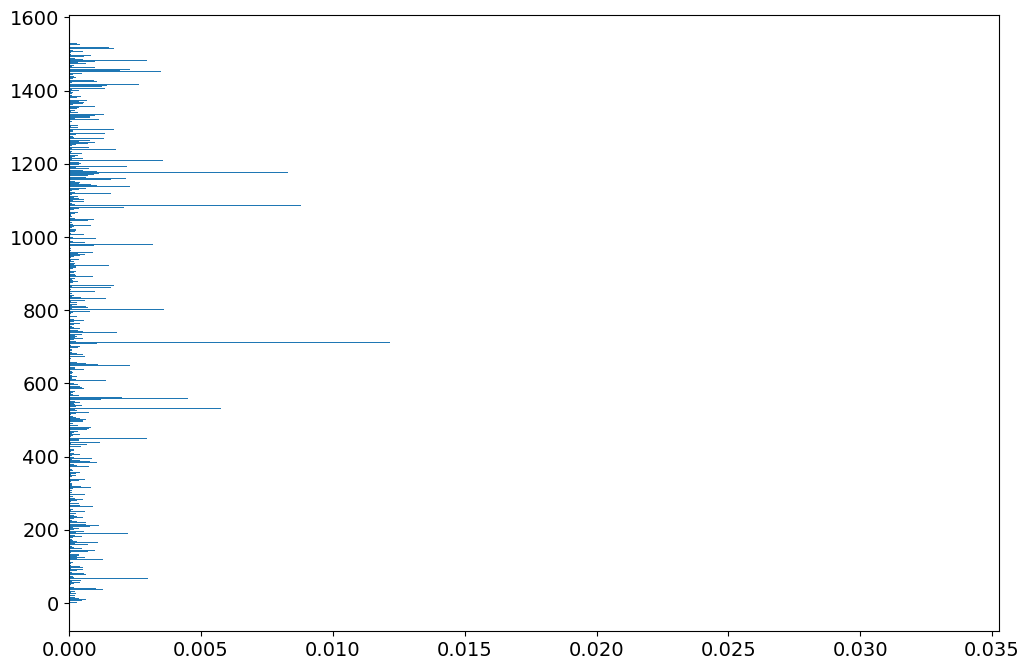

In [116]:
plt.barh(range(X_train.shape[1]), rf.feature_importances_)

Overall measures: 
Correlation - Train: 0.9924640381938907, Test: 0.9194572680437152
MAE - Train:  2.0832338803160653
MAE - Test:  5.202763683638315
R2 - Train:  0.9543738482535076
R2 - Test:  0.7170712344771071


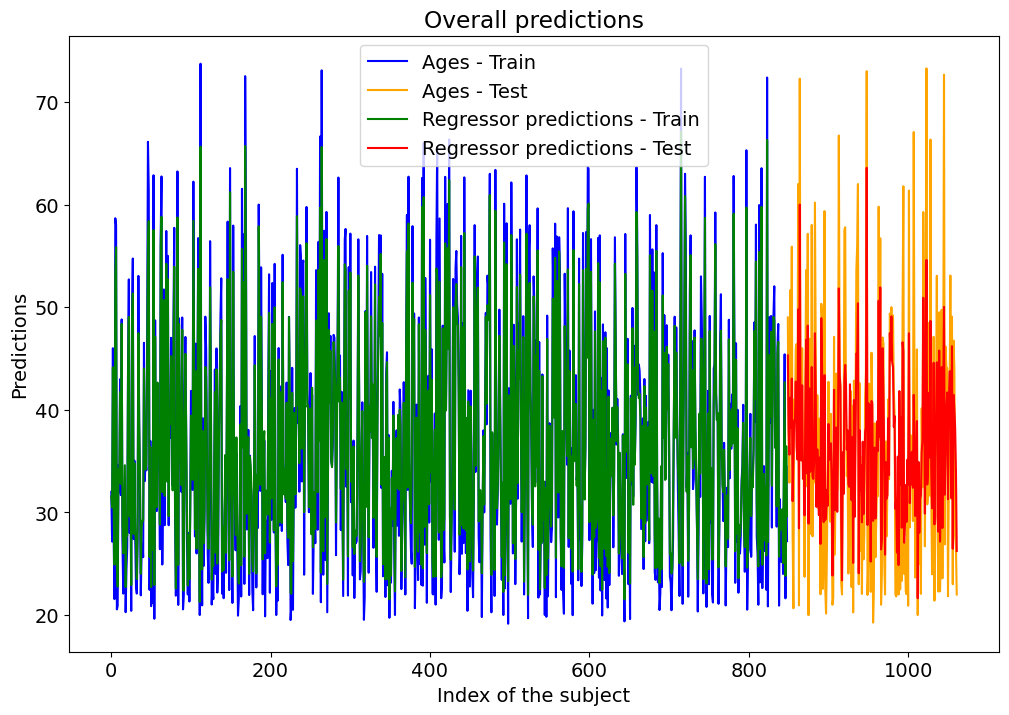

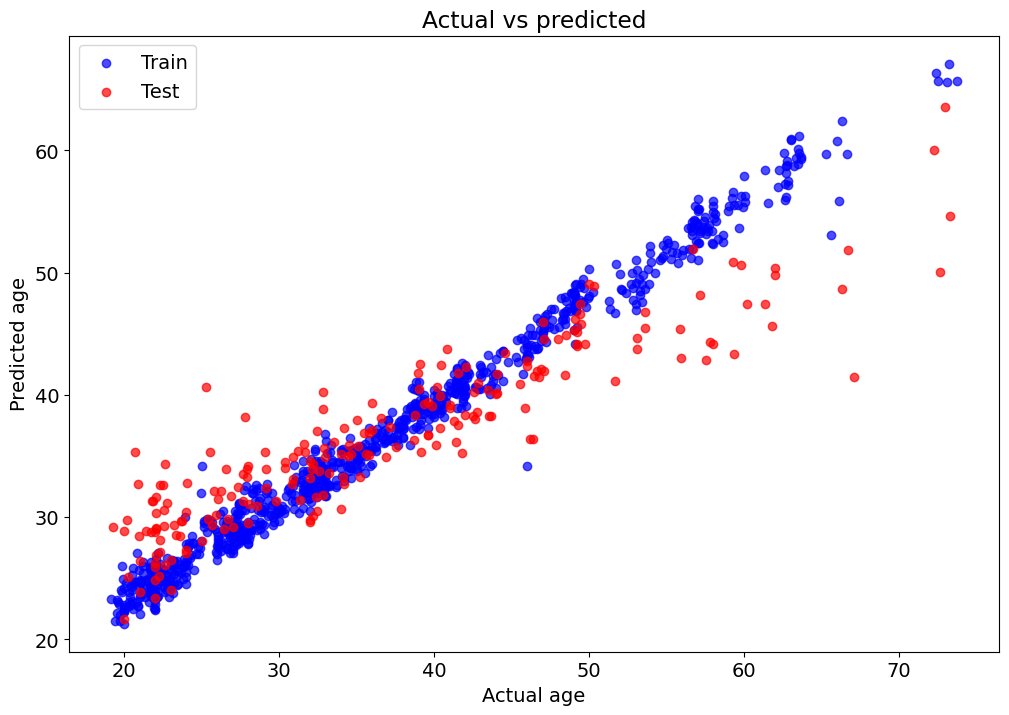

In [117]:
from scipy.stats import pearsonr

pred_train = rf.predict(X_aug[indices_train])
pred_test = rf.predict(X_aug[indices_test])

print("Overall measures: ")
corr_train, _ = pearsonr(pred_train, y_aug[indices_train])
corr_test, _ = pearsonr(pred_test, y_aug[indices_test])
print(f"Correlation - Train: {corr_train}, Test: {corr_test}")

mae_train = sum(abs(pred_train - y_aug[indices_train])) / len(y_aug[indices_train])
mae_test = sum(abs(pred_test - y_aug[indices_test])) / len(y_aug[indices_test])
print("MAE - Train: ", mae_train)
print("MAE - Test: ", mae_test)

r2_train = rf.score(X_aug[indices_train], y_aug[indices_train])
r2_test = rf.score(X_aug[indices_test], y_aug[indices_test])
print("R2 - Train: ", r2_train)
print("R2 - Test: ", r2_test)

x_train = range(len(indices_train))
x_test = range(len(indices_train), len(indices_train) + len(indices_test))

plt.plot(x_train, y_aug[indices_train], label='Ages - Train', color='blue')
plt.plot(x_test, y_aug[indices_test], label='Ages - Test', color='orange')
plt.plot(x_train, pred_train, label='Regressor predictions - Train', color='green')
plt.plot(x_test, pred_test, label='Regressor predictions - Test', color='red')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.title("Overall predictions")
plt.legend()
plt.show()

plt.scatter(y_aug[indices_train], pred_train, label='Train', color='blue', alpha=0.7)
plt.scatter(y_aug[indices_test], pred_test, label='Test', color='red', alpha=0.7)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.legend()
plt.show()

In [134]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

rfcv = RandomForestRegressor(n_estimators=100)

fold_errors = []

kf = KFold(n_splits=10, shuffle=True)

for train_index, val_index in kf.split(X_aug):
    X_train, X_val = X_aug[train_index], X_aug[val_index]
    y_train, y_val = y_aug[train_index], y_aug[val_index]
    
    rfcv.fit(X_train, y_train)
    
    y_pred = rfcv.predict(X_val)
    fold_error = mean_absolute_error(y_val, y_pred)
    
    fold_errors.append(fold_error)

for i, error in enumerate(fold_errors):
    print(f"Iteration {i+1}: Validation Error = {error}")

print("Average validation error: ", np.mean(fold_errors))

Iteration 1: Validation Error = 5.241218907898747
Iteration 2: Validation Error = 4.3405758474731675
Iteration 3: Validation Error = 4.9771036114021765
Iteration 4: Validation Error = 4.778119273770197
Iteration 5: Validation Error = 5.14212831854521
Iteration 6: Validation Error = 5.211712420470219
Iteration 7: Validation Error = 4.3300497319777485
Iteration 8: Validation Error = 5.185063555456855
Iteration 9: Validation Error = 5.431942923172634
Iteration 10: Validation Error = 5.656821909521988
Average validation error:  5.029473649968894


In [137]:
import time

# Labels are stored in the variable 'labels'
# Rest of the data features are stored in 'X'
sigma = 2
n_estimators = 100
sigmas = [0.1,0.3,0.5,1]
ns = [50,75, 100,125]
ks = [6,8,10,12,15]

errors = []
times = []

for sigma in sigmas:
    for n_estimators in ns:
        for k in ks:
            start = time.time()
            X_aug2 = []
            y_aug2 = []

            X_aug2.append(X)
            y_aug2.append(y)

            for _ in range(k):
                noisex = np.random.normal(loc=0, scale=sigma, size=X.shape)
                noisey = np.random.normal(loc=0, scale=sigma, size=y.shape)
                X_aug2.append(X + noisex)
                y_aug2.append(y + noisey)

            X_aug2 = np.concatenate(X_aug2, axis=0)
            y_aug2 = np.concatenate(y_aug2, axis=0)

            rfgs = RandomForestRegressor(n_estimators=n_estimators)

            fold_errors = []

            kf = KFold(n_splits=10, shuffle=True)

            for train_index, val_index in kf.split(X_aug2):
                X_train, X_val = X_aug2[train_index], X_aug2[val_index]
                y_train, y_val = y_aug2[train_index], y_aug2[val_index]
                
                rfcv.fit(X_train, y_train)
                
                y_pred = rfcv.predict(X_val)
                fold_error = mean_absolute_error(y_val, y_pred)
                
                fold_errors.append(fold_error)

            for i, error in enumerate(fold_errors):
                print(f"Iteration {i+1}: Validation Error = {error}")

            avg_val_err = np.mean(fold_errors)
            print("Average validation error: ", avg_val_err)
            end = time.time()

            errors.append(avg_val_err)
            times.append(end-start)

Iteration 1: Validation Error = 2.250936208578303
Iteration 2: Validation Error = 2.161700182017868
Iteration 3: Validation Error = 2.318861157581537
Iteration 4: Validation Error = 2.454058572712644
Iteration 5: Validation Error = 2.3580722168660793
Iteration 6: Validation Error = 2.438078731720479
Iteration 7: Validation Error = 1.9802773755584724
Iteration 8: Validation Error = 1.9436063473762057
Iteration 9: Validation Error = 1.5890235345111172
Iteration 10: Validation Error = 1.737895511683145
Average validation error:  2.123250983860585
Iteration 1: Validation Error = 2.180372776006771
Iteration 2: Validation Error = 1.6749029864814418
Iteration 3: Validation Error = 1.8065218398776182
Iteration 4: Validation Error = 1.7596836397010704
Iteration 5: Validation Error = 1.6208858428898536
Iteration 6: Validation Error = 1.8128239424958565
Iteration 7: Validation Error = 1.7052213005194365
Iteration 8: Validation Error = 1.7621319553543886
Iteration 9: Validation Error = 1.616738379

In [182]:
np.save("errors.npy",errors)
np.save("times.npy",times)

In [139]:
times

[453.232919216156,
 615.4992399215698,
 783.0041449069977,
 963.6725449562073,
 1261.8457012176514,
 451.79561018943787,
 617.7272660732269,
 789.9161767959595,
 970.119815826416,
 1246.8568789958954,
 453.23779582977295,
 616.643844127655,
 788.2283709049225,
 973.6084778308868,
 1232.3524017333984,
 451.5641610622406,
 614.1331520080566,
 795.9770369529724,
 971.6059560775757,
 1253.42227101326,
 454.43320393562317,
 616.7751598358154,
 812.8118703365326,
 981.7006332874298,
 1262.8222060203552,
 453.2317440509796,
 634.3313491344452,
 806.5165979862213,
 1001.2140069007874,
 1284.6416409015656,
 455.2351200580597,
 613.6963279247284,
 857.8154928684235,
 1097.3567090034485,
 1292.2801749706268,
 452.571830034256,
 621.4726150035858,
 817.1797692775726,
 987.097660779953,
 1307.4048869609833,
 467.38573479652405,
 625.9393992424011,
 810.4163219928741,
 981.8742320537567,
 1258.0406680107117,
 448.6002109050751,
 624.325287103653,
 812.4187479019165,
 986.5483028888702,
 1301.2817389

In [141]:
i = 0
print("sigma, n_estimators, k, errors[i], times[i]")

for sigma in sigmas:
    for n_estimators in ns:
        for k in ks:
            print(sigma, n_estimators, k, errors[i], times[i])
            i+=1

sigma, n_estimators, k, errors[i], times[i]
0.1 50 6 2.123250983860585 453.232919216156
0.1 50 8 1.7697958887252667 615.4992399215698
0.1 50 10 1.532520956577137 783.0041449069977
0.1 50 12 1.3784826844318918 963.6725449562073
0.1 50 15 1.2030712465081277 1261.8457012176514
0.1 75 6 2.210551039687014 451.79561018943787
0.1 75 8 1.8909582909170042 617.7272660732269
0.1 75 10 1.4766223296356207 789.9161767959595
0.1 75 12 1.396888805410257 970.119815826416
0.1 75 15 1.2144714680147513 1246.8568789958954
0.1 100 6 2.241098546302769 453.23779582977295
0.1 100 8 1.8135697719582127 616.643844127655
0.1 100 10 1.5070237202828594 788.2283709049225
0.1 100 12 1.3601275038884917 973.6084778308868
0.1 100 15 1.1969515264626422 1232.3524017333984
0.1 125 6 2.1404832101615003 451.5641610622406
0.1 125 8 1.7378186280110761 614.1331520080566
0.1 125 10 1.5678111284230938 795.9770369529724
0.1 125 12 1.3451873026163441 971.6059560775757
0.1 125 15 1.1794782507379347 1253.42227101326
0.3 50 6 4.2868358

In [154]:
errors3D = np.zeros((len(sigmas),len(ns),len(ks)))
times3D = np.zeros((len(sigmas),len(ns),len(ks)))
num = 0

for i in range(len(sigmas)):
    for j in range(len(ns)):
        for k in range(len(ks)):
            errors3D[i,j,k] = errors[num]
            times3D[i,j,k] = times[num]
            num+=1

errors3D

array([[[2.12325098, 1.76979589, 1.53252096, 1.37848268, 1.20307125],
        [2.21055104, 1.89095829, 1.47662233, 1.39688881, 1.21447147],
        [2.24109855, 1.81356977, 1.50702372, 1.3601275 , 1.19695153],
        [2.14048321, 1.73781863, 1.56781113, 1.3451873 , 1.17947825]],

       [[4.28683585, 3.8541405 , 3.58093565, 3.1768424 , 2.91375306],
        [4.25960782, 3.77986951, 3.4747384 , 3.32528491, 3.08050311],
        [4.12431932, 3.73760849, 3.41047263, 3.17582765, 2.83535859],
        [4.18370345, 3.81547604, 3.4099056 , 3.33628489, 2.84951043]],

       [[5.90781638, 5.39521292, 4.97436199, 4.73247219, 4.40128648],
        [5.77657446, 5.35746598, 5.15109245, 4.75935523, 4.44682116],
        [5.73852854, 5.34977451, 5.07595411, 4.70807883, 4.46004901],
        [5.83085498, 5.42989768, 5.07186537, 4.84238706, 4.46394712]],

       [[7.96613125, 7.81418057, 7.45132135, 7.37665893, 7.04167548],
        [7.95260576, 7.80976003, 7.52449701, 7.39153056, 6.99993087],
        [7.991

0 50
1 75
2 100
3 125


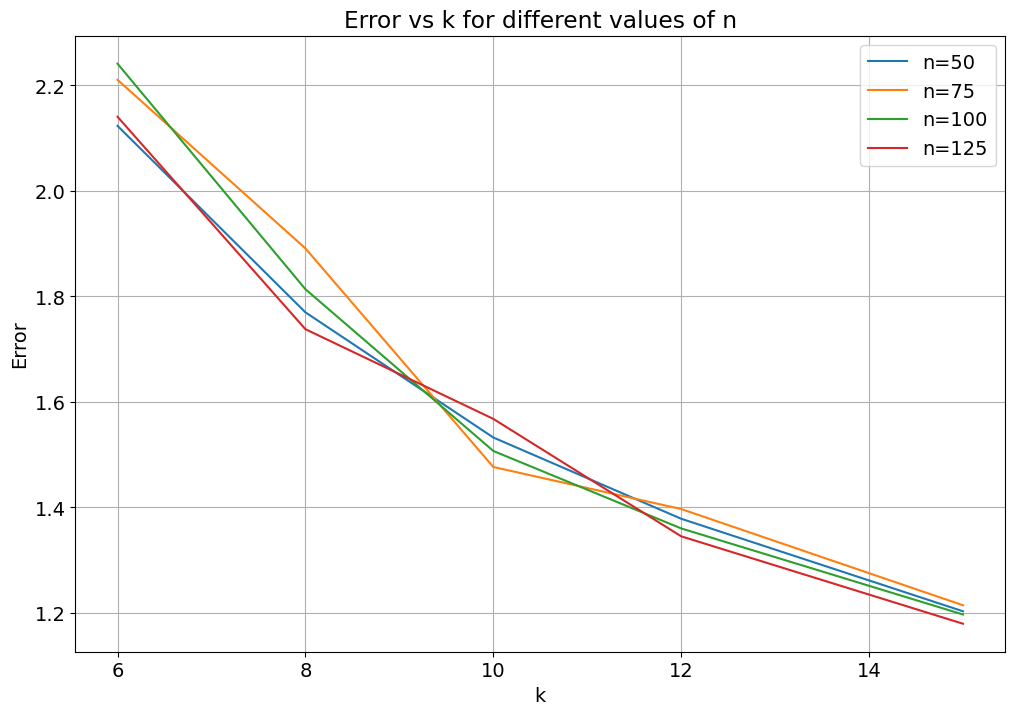

In [155]:
for j, n in enumerate(ns):
    print(j,n)
    plt.plot(ks, [errors3D[0,j,i] for i in range(len(ks))], label=f'n={n}')

plt.xlabel('k')
plt.ylabel('Error')
plt.title('Error vs k for different values of n')
plt.legend()
plt.grid(True)
plt.show()

0 50
1 75
2 100
3 125


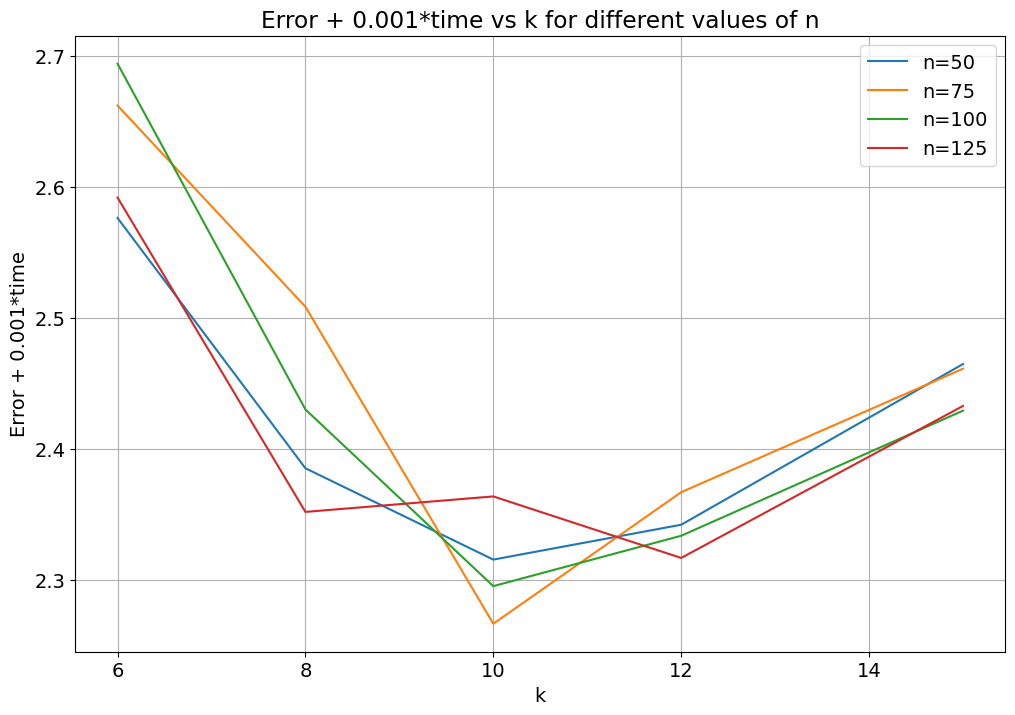

In [171]:
for j, n in enumerate(ns):
    print(j,n)
    plt.plot(ks, [errors3D[0,j,i]+0.001*times3D[0,j,i] for i in range(len(ks))], label=f'n={n}')

plt.xlabel('k')
plt.ylabel('Error + 0.001*time')
plt.title('Error + 0.001*time vs k for different values of n')
plt.legend()
plt.grid(True)
plt.show()

0 6
1 8
2 10
3 12
4 15


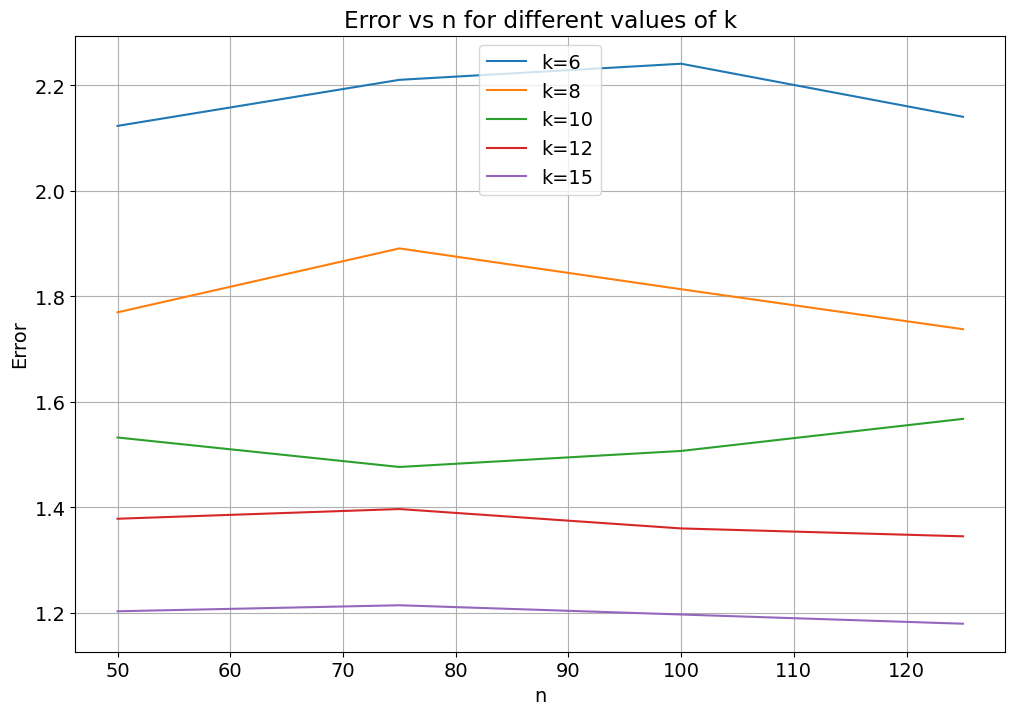

In [176]:
for j, k in enumerate(ks):
    print(j,k)
    plt.plot(ns, [errors3D[0,i,j] for i in range(len(ns))], label=f'k={k}')

plt.xlabel('n')
plt.ylabel('Error')
plt.title('Error vs n for different values of k')
plt.legend()
plt.grid(True)
plt.show()

0 6
1 8
2 10
3 12
4 15


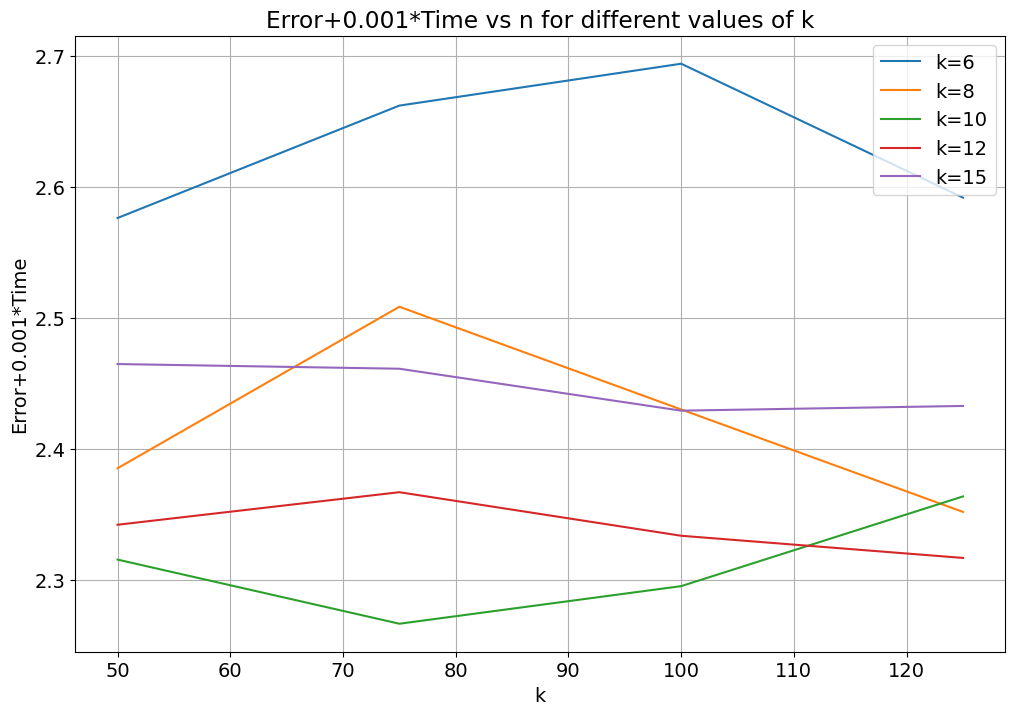

In [175]:
for j, k in enumerate(ks):
    print(j,k)
    plt.plot(ns, [errors3D[0,i,j]+0.001*times3D[0,i,j] for i in range(len(ns))], label=f'k={k}')

plt.xlabel('n')
plt.ylabel('Error+0.001*Time')
plt.title('Error+0.001*Time vs n for different values of k')
plt.legend()
plt.grid(True)
plt.show()

## k = 10 and n = 75 seems to be ideal

In [177]:
import time

# Labels are stored in the variable 'labels'
# Rest of the data features are stored in 'X'
sigma = 0.1
n_estimators = 75
k = 10

start = time.time()
X_aug2 = []
y_aug2 = []

X_aug2.append(X)
y_aug2.append(y)

for _ in range(k):
    noisex = np.random.normal(loc=0, scale=sigma, size=X.shape)
    noisey = np.random.normal(loc=0, scale=sigma, size=y.shape)
    X_aug2.append(X + noisex)
    y_aug2.append(y + noisey)

X_aug2 = np.concatenate(X_aug2, axis=0)
y_aug2 = np.concatenate(y_aug2, axis=0)

rfgs = RandomForestRegressor(n_estimators=n_estimators)

fold_errors = []

kf = KFold(n_splits=10, shuffle=True)

for train_index, val_index in kf.split(X_aug2):
    X_train, X_val = X_aug2[train_index], X_aug2[val_index]
    y_train, y_val = y_aug2[train_index], y_aug2[val_index]
    
    rfcv.fit(X_train, y_train)
    
    y_pred = rfcv.predict(X_val)
    fold_error = mean_absolute_error(y_val, y_pred)
    
    fold_errors.append(fold_error)

for i, error in enumerate(fold_errors):
    print(f"Iteration {i+1}: Validation Error = {error}")

avg_val_err = np.mean(fold_errors)
print("Average validation error: ", avg_val_err)
end = time.time()
print("Time: ",end-start)

Iteration 1: Validation Error = 1.477621839683421
Iteration 2: Validation Error = 1.428831422922082
Iteration 3: Validation Error = 1.4934006967598052
Iteration 4: Validation Error = 1.3380493655651486
Iteration 5: Validation Error = 1.7180714842769105
Iteration 6: Validation Error = 1.4174241968114634
Iteration 7: Validation Error = 1.6799725522255298
Iteration 8: Validation Error = 1.681309359303384
Iteration 9: Validation Error = 1.5790709011461814
Iteration 10: Validation Error = 1.7832809149996844
Average validation error:  1.5597032733693612
Time:  842.0542769432068


## Now first I'll split the data into train and test datasets. Then I'll perform k-fold cross validation within the train dataset (so that test set is unseen by the model). Then I will test accuracy on the test dataset.

In [190]:
X_aug3 = []
y_aug3 = []

X_aug3.append(X)
y_aug3.append(y)

for _ in range(12):
    noisex = np.random.normal(loc=0, scale=0.1, size=X.shape)
    noisey = np.random.normal(loc=0, scale=0.1, size=y.shape)
    X_aug3.append(X + noisex)
    y_aug3.append(y + noisey)

X_aug3 = np.concatenate(X_aug3, axis=0)
y_aug3 = np.concatenate(y_aug3, axis=0)

X_train1, X_test1, y_train1, y_test1, indices_train1, indices_test1 = train_test_split(X_aug3, y_aug3, np.arange(X_aug3.shape[0]), test_size=0.2, random_state=42)
print("Training set size:", X_train1.shape)
print("Testing set size:", X_test1.shape)

Training set size: (1227, 1530)
Testing set size: (307, 1530)


In [191]:
import time

# Labels are stored in the variable 'labels'
# Rest of the data features are stored in 'X'
sigma = 0.1
n_estimators = 75
k = 10

start = time.time()

rfgs = RandomForestRegressor(n_estimators=n_estimators)

fold_errors = []

kf = KFold(n_splits=10, shuffle=True)

for train_index, val_index in kf.split(X_train1):
    X_train2, X_val2 = X_train1[train_index], X_train1[val_index]
    y_train2, y_val2 = y_train1[train_index], y_train1[val_index]
    
    rfcv.fit(X_train2, y_train2)
    
    y_pred = rfcv.predict(X_val2)
    fold_error = mean_absolute_error(y_val2, y_pred)
    
    fold_errors.append(fold_error)

for i, error in enumerate(fold_errors):
    print(f"Iteration {i+1}: Validation Error = {error}")

avg_val_err = np.mean(fold_errors)
print("Average validation error: ", avg_val_err)
end = time.time()
print("Time: ",end-start)

Iteration 1: Validation Error = 1.629594937653275
Iteration 2: Validation Error = 1.2148603022713627
Iteration 3: Validation Error = 1.7317331828700875
Iteration 4: Validation Error = 1.85936624507469
Iteration 5: Validation Error = 1.29764726761469
Iteration 6: Validation Error = 1.4485468121449625
Iteration 7: Validation Error = 1.8682388383218278
Iteration 8: Validation Error = 1.708775864235006
Iteration 9: Validation Error = 1.7353998759568319
Iteration 10: Validation Error = 1.6834950038605077
Average validation error:  1.617765833000324
Time:  738.9374198913574


In [192]:
print("Showing the last iteration's training error: ")
y_trpred = rfcv.predict(X_train2)
mean_absolute_error(y_train2,y_trpred)

Showing the last iteration's training error: 


0.6113346788991185

In [193]:
print("Testing the model on the test dataset after training it on the entire train set:")

rf = RandomForestRegressor(n_estimators=75)
rf.fit(X_train1,y_train1)

y_pred = rf.predict(X_test1)
mean_absolute_error(y_test1,y_pred)

Testing the model on the test dataset after training it on the entire train set:


1.4078725185729049

Test measures: 
Correlation: 0.9842323518884828
MAE:  1.4078725185729046
R2:  0.9624571936775189


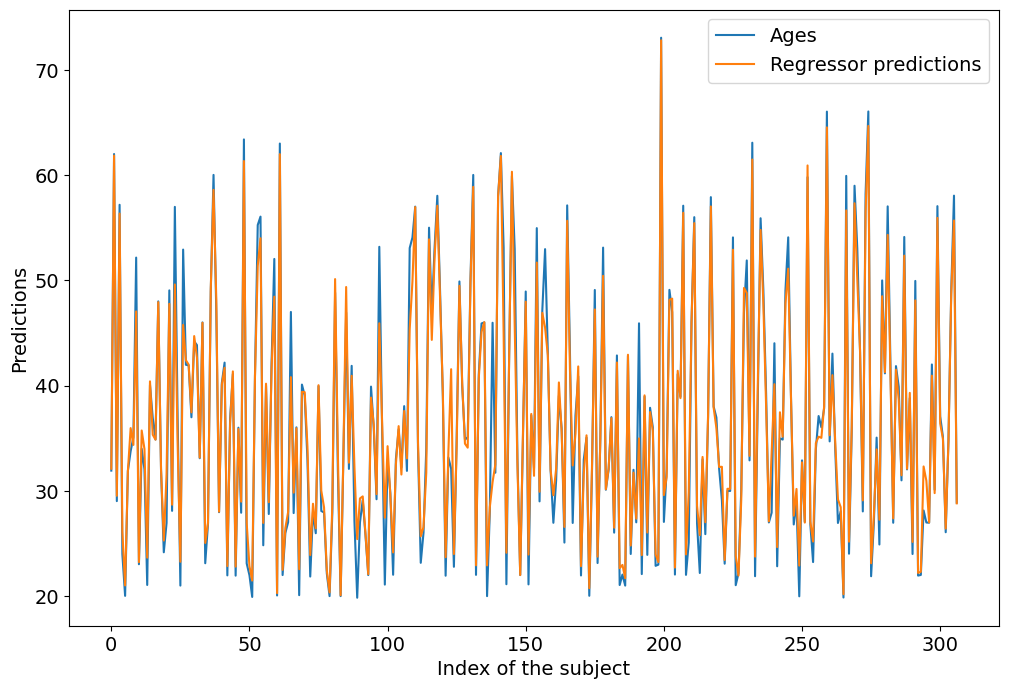

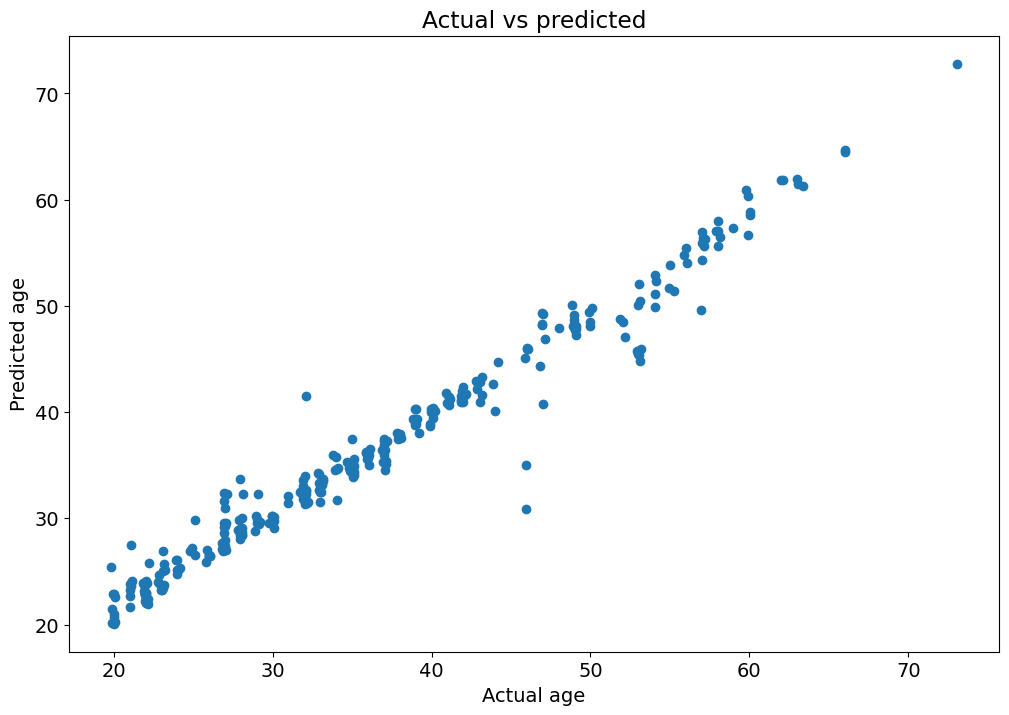

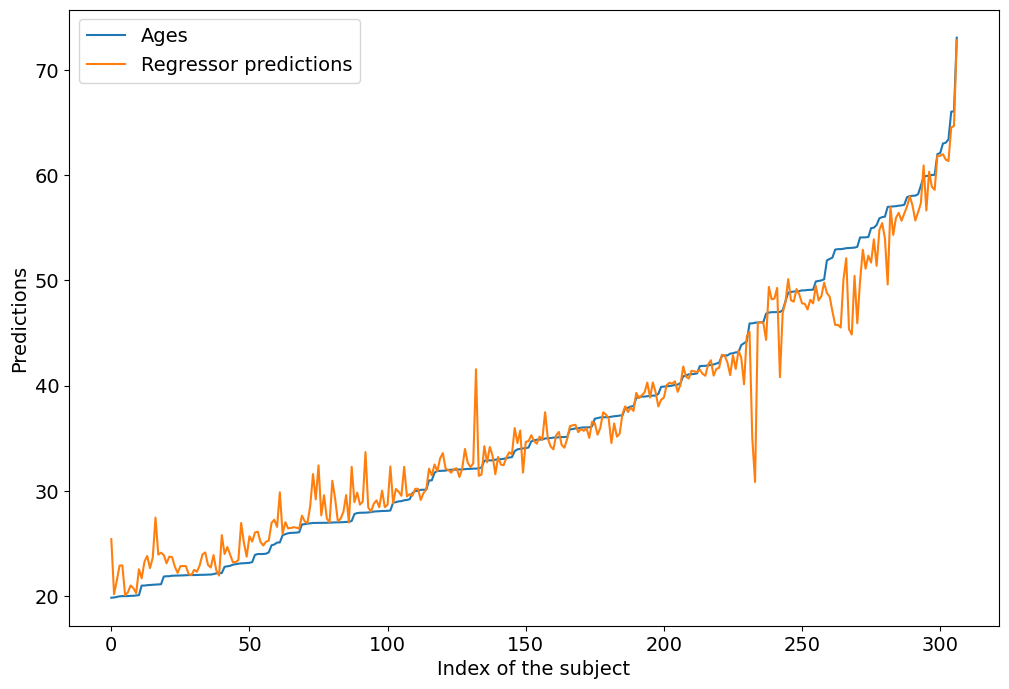

In [195]:
print("Test measures: ")
pred_t = rf.predict(X_test1)

corr_t,_ = pearsonr(pred_t,y_test1)
print(f"Correlation: {corr_t}")

mae_t = sum(abs(pred_t - y_test1))/len(y_test1)
print("MAE: ",mae_t)

r2_t = rf.score(X_test1, y_test1)
print("R2: ",r2_t)

x_t = range(len(y_test1))

plt.plot(x_t, y_test1, label='Ages')
plt.plot(x_t, pred_t, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

plt.scatter(y_test1, pred_t)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

# Sorted
sorted_data = sorted(zip(y_test1, pred_t))
sorted_y_test, sorted_pred_t = zip(*sorted_data)

plt.plot(x_t, sorted_y_test, label='Ages')
plt.plot(x_t, sorted_pred_t, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

## The issue above is that lowering sigma allows most elements to sit around discrete values, and this makes the validation error tend to zero as sigma decreases further and further. This is because of leakage of data from the train into the validation and test sets, so the model is able to memorise train data, and just sees the same data repeated in the validation and test sets.

## Thus, first we should split the original data into train, validation and test datasets. Then, we should augment the train set alone to allow for attaining a good fit to the train dataset. We can optimise the parameters so that the fit is ideal on the validation set. However this optimisation process may lead to overfitting on the validation set, so we proceed to test the error of the model on the test dataset using these optimum parameters.

In [196]:
X_train1, X_test1, y_train1, y_test1, indices_train1, indices_test1 = train_test_split(X, y, np.arange(X.shape[0]), test_size=0.2, random_state=42)
print("Training set size:", X_train1.shape)
print("Testing set size:", X_test1.shape)

Training set size: (94, 1530)
Testing set size: (24, 1530)


In [ ]:
import time

# Labels are stored in the variable 'labels'
# Rest of the data features are stored in 'X'
sigmas = [0.2,0.5,1,1.5,2,2.5]
n_estimators = 75
k = 10

start = time.time()

rfgs = RandomForestRegressor(n_estimators=n_estimators)

kf = KFold(n_splits=10, shuffle=True)

errors = []
times = []

for sigma in sigmas:
    print("sigma = ",sigma)
    fold_errors = []
    for train_index, val_index in kf.split(X_train1):
        X_train2, X_val2 = X_train1[train_index], X_train1[val_index]
        y_train2, y_val2 = y_train1[train_index], y_train1[val_index]

        X_aug4 = []
        y_aug4 = []

        X_aug4.append(X_train2)
        y_aug4.append(y_train2)

        for _ in range(k):
            noisex = np.random.normal(loc=0, scale=sigma, size=X_train2.shape)
            noisey = np.random.normal(loc=0, scale=sigma, size=y_train2.shape)
            X_aug4.append(X_train2 + noisex)
            y_aug4.append(y_train2 + noisey)

        X_aug4 = np.concatenate(X_aug4, axis=0)
        y_aug4 = np.concatenate(y_aug4, axis=0)
        
        rfgs.fit(X_aug4, y_aug4)

        print("Train error: ",mean_absolute_error(y_aug4, rfgs.predict(X_aug4)))
        
        y_pred = rfgs.predict(X_val2)
        fold_error = mean_absolute_error(y_val2, y_pred)
        
        fold_errors.append(fold_error)
        print("Validation error: ",fold_error)

    for i, error in enumerate(fold_errors):
        print(f"Iteration {i+1}: Validation Error = {error}")

    avg_val_err = np.mean(fold_errors)
    print("Average validation error: ", avg_val_err)
    end = time.time()
    print("Time: ",end-start)
    times.append(end-start)

    errors.append((sigma,avg_val_err))


## Output (Run on server)

```
sigma = 0.2
Iteration 1: Validation Error = 11.290681484202157
Iteration 2: Validation Error = 8.879767805142372
Iteration 3: Validation Error = 10.38521890808616
Iteration 4: Validation Error = 10.059248307431195
Iteration 5: Validation Error = 6.691149999095297
Iteration 6: Validation Error = 10.297888981080515
Iteration 7: Validation Error = 10.613217058430612
Iteration 8: Validation Error = 14.631788737321834
Iteration 9: Validation Error = 9.930961933562875
Iteration 10: Validation Error = 9.12817917625674
Mean = 10.190810239060976

sigma = 0.5
Iteration 11: Validation Error = 12.815760971511398
Iteration 12: Validation Error = 17.21927293139512
Iteration 13: Validation Error = 11.106372712857649
Iteration 14: Validation Error = 7.584425037108593
Iteration 15: Validation Error = 9.679358875009775
Iteration 16: Validation Error = 10.887462112656575
Iteration 17: Validation Error = 7.8042702996585
Iteration 18: Validation Error = 8.800613984922204
Iteration 19: Validation Error = 8.33870603126519
Iteration 20: Validation Error = 13.66310379282829
Mean = 10.78993467492133

sigma = 1
Iteration 21: Validation Error = 10.610193061882004
Iteration 22: Validation Error = 11.985152135068644
Iteration 23: Validation Error = 14.043939586249573
Iteration 24: Validation Error = 7.328535587074032
Iteration 25: Validation Error = 11.703239138213847
Iteration 26: Validation Error = 10.280576551424765
Iteration 27: Validation Error = 8.560835525483482
Iteration 28: Validation Error = 12.739871711407984
Iteration 29: Validation Error = 11.937292319389844
Iteration 30: Validation Error = 10.310174553074763
Mean = 10.949981016926893

sigma = 1.5
Iteration 31: Validation Error = 10.163018013406576
Iteration 32: Validation Error = 7.757780034927189
Iteration 33: Validation Error = 11.915929784431732
Iteration 34: Validation Error = 8.522734111013646
Iteration 35: Validation Error = 15.13870640825816
Iteration 36: Validation Error = 8.097350785912713
Iteration 37: Validation Error = 10.62244625397755
Iteration 38: Validation Error = 13.426300407630796
Iteration 39: Validation Error = 8.176127090437303
Iteration 40: Validation Error = 12.328863946875767
Mean = 10.614925683687144

sigma = 2
Iteration 1: Validation Error = 10.503622572899971
Iteration 2: Validation Error = 11.731184134433068
Iteration 3: Validation Error = 12.850122501859195
Iteration 4: Validation Error = 10.514127452450307
Iteration 5: Validation Error = 7.930232380136129
Iteration 6: Validation Error = 9.81627694369923
Iteration 7: Validation Error = 12.232980808814482
Iteration 8: Validation Error = 8.32818314578333
Iteration 9: Validation Error = 9.23226969278037
Iteration 10: Validation Error = 8.093843320228277
Average validation error:  10.123284295308434

sigma = 2.5
Iteration 1: Validation Error = 6.969951729439877
Iteration 2: Validation Error = 10.884676190278993
Iteration 3: Validation Error = 9.845694639144144
Iteration 4: Validation Error = 8.437862218221904
Iteration 5: Validation Error = 11.013370404172658
Iteration 6: Validation Error = 12.464632893359473
Iteration 7: Validation Error = 10.904874106663875
Iteration 8: Validation Error = 9.148870586493961
Iteration 9: Validation Error = 6.582755522754493
Iteration 10: Validation Error = 14.333366790681493
Average validation error:  10.058605508121088

sigma = 3
Iteration 1: Validation Error = 11.010711854027663
Iteration 2: Validation Error = 6.971447119425984
Iteration 3: Validation Error = 9.970685422394931
Iteration 4: Validation Error = 11.121533287303347
Iteration 5: Validation Error = 8.894545812118443
Iteration 6: Validation Error = 13.156382839476818
Iteration 7: Validation Error = 10.053141437375197
Iteration 8: Validation Error = 9.027821160094671
Iteration 9: Validation Error = 11.367215366189729
Iteration 10: Validation Error = 7.548656369767473
Average validation error:  9.912214066817425

sigma = 4
Iteration 1: Validation Error = 8.904164247651305
Iteration 2: Validation Error = 8.99876898219417
Iteration 3: Validation Error = 8.844483992596384
Iteration 4: Validation Error = 11.231597414699342
Iteration 5: Validation Error = 9.441825537637776
Iteration 6: Validation Error = 9.092564588574348
Iteration 7: Validation Error = 16.4421570517758
Iteration 8: Validation Error = 6.734457046489257
Iteration 9: Validation Error = 10.427343203974134
Iteration 10: Validation Error = 10.629976229754902
Average validation error:  10.07473382953474

sigma = 5
Iteration 1: Validation Error = 9.626467586275874
Iteration 2: Validation Error = 10.992674824098629
Iteration 3: Validation Error = 6.019010086010706
Iteration 4: Validation Error = 8.333742582173029
Iteration 5: Validation Error = 12.731906985366672
Iteration 6: Validation Error = 10.270128368071662
Iteration 7: Validation Error = 12.23259470050709
Iteration 8: Validation Error = 7.9101196661705
Iteration 9: Validation Error = 14.369945242283004
Iteration 10: Validation Error = 7.657829326340261
Average validation error:  10.014441936729742

sigma = 6
Iteration 1: Validation Error = 11.967214924318206
Iteration 2: Validation Error = 10.42902065976175
Iteration 3: Validation Error = 11.6130405876872
Iteration 4: Validation Error = 9.669378633998912
Iteration 5: Validation Error = 10.306836627902431
Iteration 6: Validation Error = 5.02397119922428
Iteration 7: Validation Error = 8.646987769490194
Iteration 8: Validation Error = 12.917127699498579
Iteration 9: Validation Error = 9.084418030431774
Iteration 10: Validation Error = 11.0129246162873
Average validation error:  10.067092074860065



```

In [231]:
a = """Iteration 31: Validation Error = 10.163018013406576
Iteration 32: Validation Error = 7.757780034927189
Iteration 33: Validation Error = 11.915929784431732
Iteration 34: Validation Error = 8.522734111013646
Iteration 35: Validation Error = 15.13870640825816
Iteration 36: Validation Error = 8.097350785912713
Iteration 37: Validation Error = 10.62244625397755
Iteration 38: Validation Error = 13.426300407630796
Iteration 39: Validation Error = 8.176127090437303
Iteration 40: Validation Error = 12.328863946875767"""


In [ ]:
b = a.split("\n")
c = [el.split("= ") for el in b]
d = np.array(c)
e = [float(f) for f in d[:,1]]
np.mean(e)

## Perhaps a softer model would have fewer estimators?

In [234]:
import time

# Labels are stored in the variable 'labels'
# Rest of the data features are stored in 'X'
sigmas = [1,2,3,4,5]
n_estimators = 20
k = 10

start = time.time()

rfgs = RandomForestRegressor(n_estimators=n_estimators)

kf = KFold(n_splits=10, shuffle=True)

errors = []
times = []

for sigma in sigmas:
    print("sigma = ",sigma)
    fold_errors = []
    for train_index, val_index in kf.split(X_train1):
        X_train2, X_val2 = X_train1[train_index], X_train1[val_index]
        y_train2, y_val2 = y_train1[train_index], y_train1[val_index]

        X_aug4 = []
        y_aug4 = []

        X_aug4.append(X_train2)
        y_aug4.append(y_train2)

        for _ in range(k):
            noisex = np.random.normal(loc=0, scale=sigma, size=X_train2.shape)
            noisey = np.random.normal(loc=0, scale=sigma, size=y_train2.shape)
            X_aug4.append(X_train2 + noisex)
            y_aug4.append(y_train2 + noisey)

        X_aug4 = np.concatenate(X_aug4, axis=0)
        y_aug4 = np.concatenate(y_aug4, axis=0)
        
        rfgs.fit(X_aug4, y_aug4)

        print("Train error: ",mean_absolute_error(y_aug4, rfgs.predict(X_aug4)))
        
        y_pred = rfgs.predict(X_val2)
        fold_error = mean_absolute_error(y_val2, y_pred)
        
        fold_errors.append(fold_error)
        print("Validation error: ",fold_error)

    for i, error in enumerate(fold_errors):
        print(f"Iteration {i+1}: Validation Error = {error}")

    avg_val_err = np.mean(fold_errors)
    print("Average validation error: ", avg_val_err)
    end = time.time()
    print("Time: ",end-start)
    times.append(end-start)

    errors.append((sigma,avg_val_err))


sigma =  1
Train error:  2.9024621767055714
Validation error:  7.537559813250813
Train error:  2.7247500373380973
Validation error:  10.156598148397569
Train error:  2.735010596755173
Validation error:  11.608361663871083
Train error:  2.649245442415713
Validation error:  12.113761410816007
Train error:  2.8646609305686574
Validation error:  8.247775005093274
Train error:  2.700056885909844
Validation error:  8.96780873638281
Train error:  2.75223731831159
Validation error:  11.148705470554283
Train error:  2.8099740934153825
Validation error:  6.377178459808295
Train error:  2.6297657483763186
Validation error:  15.515737502610481
Train error:  2.8061255568268906
Validation error:  8.136759246426063
Iteration 1: Validation Error = 7.537559813250813
Iteration 2: Validation Error = 10.156598148397569
Iteration 3: Validation Error = 11.608361663871083
Iteration 4: Validation Error = 12.113761410816007
Iteration 5: Validation Error = 8.247775005093274
Iteration 6: Validation Error = 8.967

```
n_est = 20
sigma = 1
Iteration 1: Validation Error = 7.537559813250813
Iteration 2: Validation Error = 10.156598148397569
Iteration 3: Validation Error = 11.608361663871083
Iteration 4: Validation Error = 12.113761410816007
Iteration 5: Validation Error = 8.247775005093274
Iteration 6: Validation Error = 8.96780873638281
Iteration 7: Validation Error = 11.148705470554283
Iteration 8: Validation Error = 6.377178459808295
Iteration 9: Validation Error = 15.515737502610481
Iteration 10: Validation Error = 8.136759246426063
Average validation error:  9.981024545721068

sigma = 2
Iteration 1: Validation Error = 11.42484413291039
Iteration 2: Validation Error = 8.670521105314068
Iteration 3: Validation Error = 10.204724361415881
Iteration 4: Validation Error = 9.518151429647975
Iteration 5: Validation Error = 10.246462904292425
Iteration 6: Validation Error = 12.316029982242524
Iteration 7: Validation Error = 11.702827314443418
Iteration 8: Validation Error = 11.053197969754775
Iteration 9: Validation Error = 12.059250199466321
Iteration 10: Validation Error = 9.365134802148667
Average validation error:  10.656114420163643

sigma = 3
Iteration 1: Validation Error = 12.55215942019274
Iteration 2: Validation Error = 13.775580054492764
Iteration 3: Validation Error = 5.382250294041559
Iteration 4: Validation Error = 14.581345332791773
Iteration 5: Validation Error = 9.55970596992488
Iteration 6: Validation Error = 8.467379235211345
Iteration 7: Validation Error = 7.8444809252795205
Iteration 8: Validation Error = 10.534943943146667
Iteration 9: Validation Error = 12.26443569948561
Iteration 10: Validation Error = 10.185868140006214
Average validation error:  10.514814901457308

sigma = 4
Iteration 1: Validation Error = 9.185581417557936
Iteration 2: Validation Error = 11.59892977730903
Iteration 3: Validation Error = 14.37721596425149
Iteration 4: Validation Error = 9.888770258721584
Iteration 5: Validation Error = 7.589905535454889
Iteration 6: Validation Error = 10.73076276616491
Iteration 7: Validation Error = 8.50318789736325
Iteration 8: Validation Error = 7.570008099078759
Iteration 9: Validation Error = 12.406063418038096
Iteration 10: Validation Error = 9.399282799360508
Average validation error:  10.124970793330046

sigma = 5
Iteration 1: Validation Error = 11.507350806049088
Iteration 2: Validation Error = 10.426163746684516
Iteration 3: Validation Error = 10.16354133278177
Iteration 4: Validation Error = 7.980440864673642
Iteration 5: Validation Error = 10.771207897074103
Iteration 6: Validation Error = 6.757845716978668
Iteration 7: Validation Error = 14.257690201804849
Iteration 8: Validation Error = 9.938219871024128
Iteration 9: Validation Error = 7.69023317466871
Iteration 10: Validation Error = 7.741038895138006
Average validation error:  9.723373250687747
```

Okay, that didn't work either. Let's reduce it further.

In [244]:
import time

# Labels are stored in the variable 'labels'
# Rest of the data features are stored in 'X'
sigmas = [1,2,3,4,5]
n_estimators = 10
k = 3

start = time.time()

rfgs = RandomForestRegressor(n_estimators=n_estimators)

kf = KFold(n_splits=10, shuffle=True)

errors = []
times = []
fimps = []

for sigma in sigmas:
    print("sigma = ",sigma)
    fold_errors = []
    fold_fimps = []
    for train_index, val_index in kf.split(X_train1):
        X_train2, X_val2 = X_train1[train_index], X_train1[val_index]
        y_train2, y_val2 = y_train1[train_index], y_train1[val_index]

        X_aug4 = []
        y_aug4 = []

        X_aug4.append(X_train2)
        y_aug4.append(y_train2)

        for _ in range(k):
            noisex = np.random.normal(loc=0, scale=sigma, size=X_train2.shape)
            noisey = np.random.normal(loc=0, scale=sigma, size=y_train2.shape)
            X_aug4.append(X_train2 + noisex)
            y_aug4.append(y_train2 + noisey)

        X_aug4 = np.concatenate(X_aug4, axis=0)
        y_aug4 = np.concatenate(y_aug4, axis=0)
        
        rfgs.fit(X_aug4, y_aug4)

        print(rfgs.feature_importances_)
        fold_fimps.append(rfgs.feature_importances_)

        print("Train error: ",mean_absolute_error(y_aug4, rfgs.predict(X_aug4)))
        
        y_pred = rfgs.predict(X_val2)
        fold_error = mean_absolute_error(y_val2, y_pred)
        
        fold_errors.append(fold_error)
        print("Validation error: ",fold_error)

    for i, error in enumerate(fold_errors):
        print(f"Iteration {i+1}: Validation Error = {error}")

    avg_val_err = np.mean(fold_errors)
    print("Average validation error: ", avg_val_err)
    end = time.time()
    print("Time: ",end-start)
    times.append(end-start)
    fimps.append(fold_fimps)
    errors.append((sigma,avg_val_err))


sigma =  1
[2.04952644e-03 3.42032409e-06 4.94361580e-03 ... 6.63454222e-05
 0.00000000e+00 3.27487397e-06]
Train error:  3.3596610652833863
Validation error:  8.650721168424415
[4.06130813e-04 4.19294348e-04 4.06143912e-03 ... 1.77919064e-07
 4.10249455e-03 0.00000000e+00]
Train error:  3.485654738332264
Validation error:  9.828354522388366
[1.91844749e-05 1.77637389e-05 1.60213455e-10 ... 9.45004399e-06
 1.35439210e-03 1.59338486e-06]
Train error:  3.426415601322828
Validation error:  12.744799041934986
[1.67741301e-09 1.38668828e-03 2.45585993e-08 ... 6.01260427e-08
 1.77022574e-03 0.00000000e+00]
Train error:  3.4791847459693255
Validation error:  9.218607817079718
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.14030605e-06
 1.15990569e-08 5.47568210e-04]
Train error:  3.1116512928515263
Validation error:  13.638614809540506
[2.55203160e-06 0.00000000e+00 1.23198563e-05 ... 2.33771563e-04
 0.00000000e+00 0.00000000e+00]
Train error:  3.29126974637349
Validation error:  9.99609

(5, 10, 1530)


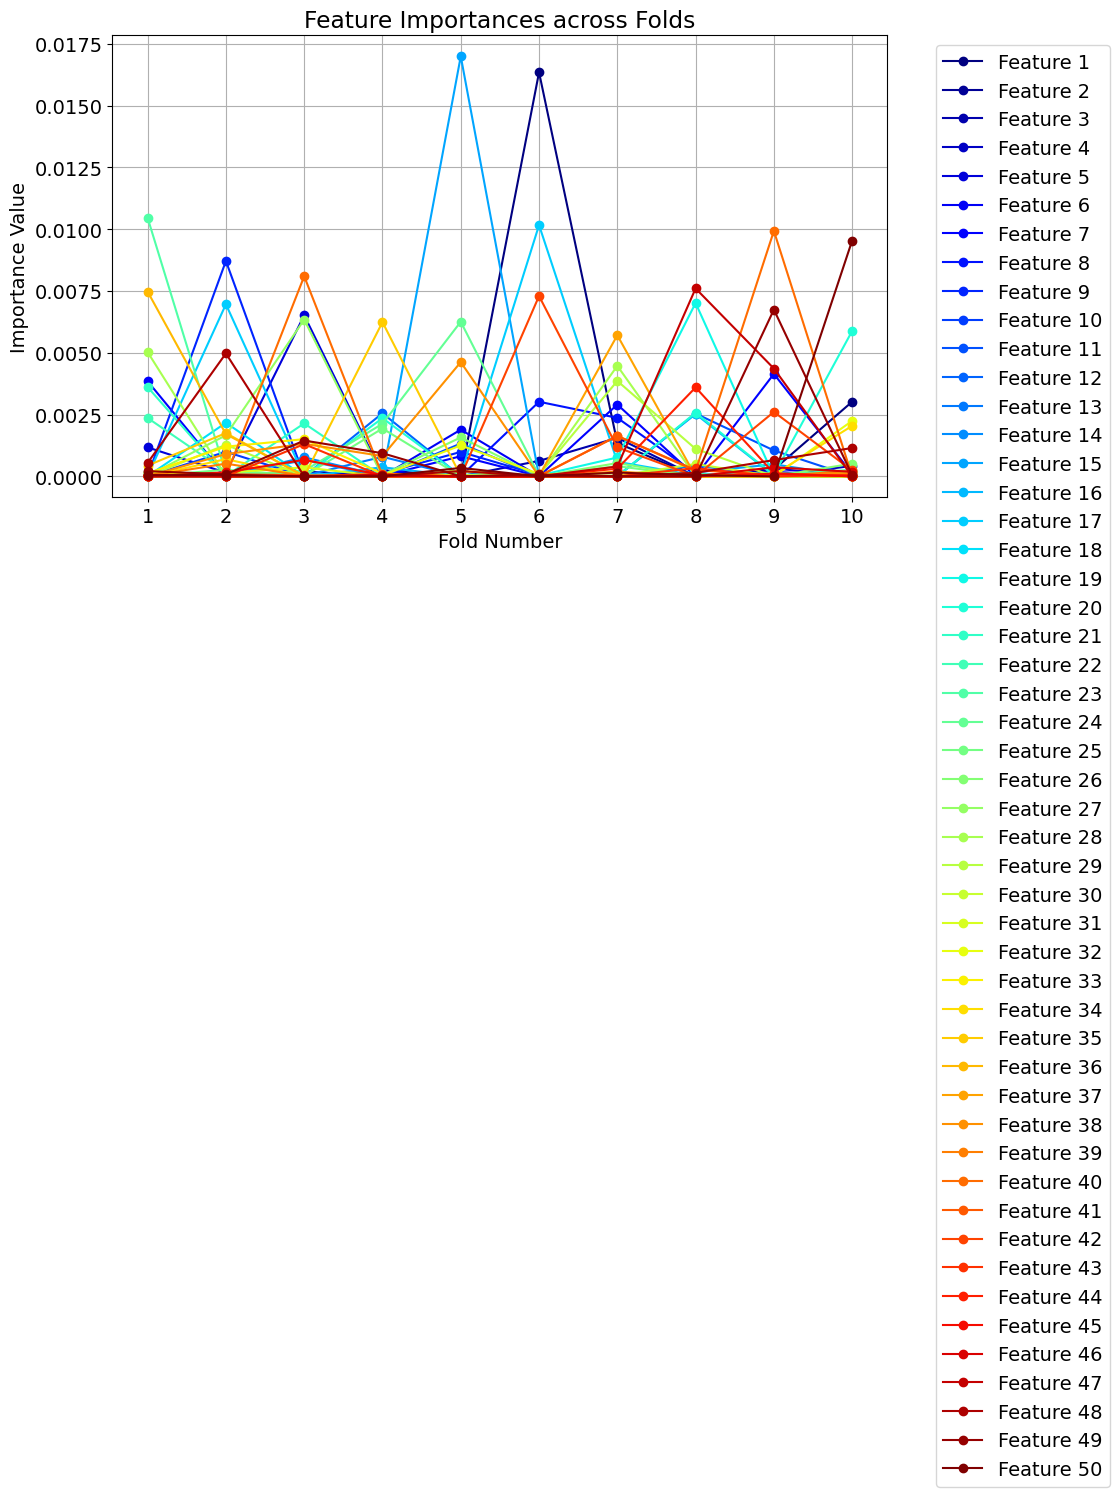

In [254]:
fimps = np.array(fimps)
sigs = fimps.shape[0]
folds = fimps.shape[1]
num_f = fimps.shape[2]
print(fimps.shape)

s = 4

colors = plt.cm.jet(np.linspace(0, 1, 50))

plt.figure(figsize=(10, 6))

for i in range(50):
    fimpacrossfolds = fimps[s,:,i]
    plt.plot(range(1, folds + 1), fimpacrossfolds, marker='o', color=colors[i], label=f'Feature {i+1}')

plt.xlabel('Fold Number')
plt.ylabel('Importance Value')
plt.title('Feature Importances across Folds')
plt.xticks(range(1, folds + 1))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.grid(True)
plt.show()

## Trying the same without any augmentation

In [255]:
import time

# Labels are stored in the variable 'labels'
# Rest of the data features are stored in 'X'
sigmas = [1,2,3,4,5]
n_estimators = 10
k = 3

start = time.time()

rfgs = RandomForestRegressor(n_estimators=n_estimators)

kf = KFold(n_splits=10, shuffle=True)

errors = []
times = []
fimps = []

for sigma in sigmas:
    print("sigma = ",sigma)
    fold_errors = []
    fold_fimps = []
    for train_index, val_index in kf.split(X_train1):
        X_train2, X_val2 = X_train1[train_index], X_train1[val_index]
        y_train2, y_val2 = y_train1[train_index], y_train1[val_index]

        X_aug4 = []
        y_aug4 = []

        X_aug4.append(X_train2)
        y_aug4.append(y_train2)

        # for _ in range(k):
        #     noisex = np.random.normal(loc=0, scale=sigma, size=X_train2.shape)
        #     noisey = np.random.normal(loc=0, scale=sigma, size=y_train2.shape)
        #     X_aug4.append(X_train2 + noisex)
        #     y_aug4.append(y_train2 + noisey)

        X_aug4 = np.concatenate(X_aug4, axis=0)
        y_aug4 = np.concatenate(y_aug4, axis=0)
        
        rfgs.fit(X_aug4, y_aug4)

        print(rfgs.feature_importances_)
        fold_fimps.append(rfgs.feature_importances_)

        print("Train error: ",mean_absolute_error(y_aug4, rfgs.predict(X_aug4)))
        
        y_pred = rfgs.predict(X_val2)
        fold_error = mean_absolute_error(y_val2, y_pred)
        
        fold_errors.append(fold_error)
        print("Validation error: ",fold_error)

    for i, error in enumerate(fold_errors):
        print(f"Iteration {i+1}: Validation Error = {error}")

    avg_val_err = np.mean(fold_errors)
    print("Average validation error: ", avg_val_err)
    end = time.time()
    print("Time: ",end-start)
    times.append(end-start)
    fimps.append(fold_fimps)
    errors.append((sigma,avg_val_err))


sigma =  1
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.36962524e-06
 0.00000000e+00 3.23049740e-05]
Train error:  3.883630952380952
Validation error:  10.145
[2.80736153e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Train error:  4.180357142857142
Validation error:  10.52
[0. 0. 0. ... 0. 0. 0.]
Train error:  4.086309523809524
Validation error:  8.100000000000001
[0. 0. 0. ... 0. 0. 0.]
Train error:  3.5630952380952383
Validation error:  11.549999999999997
[2.28049967e-05 1.58368033e-05 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Train error:  4.189411764705882
Validation error:  8.955555555555556
[3.94785965e-04 2.09585795e-02 0.00000000e+00 ... 1.09522759e-05
 0.00000000e+00 0.00000000e+00]
Train error:  3.8927647058823522
Validation error:  9.848888888888888
[0.00000000e+00 4.50457612e-05 0.00000000e+00 ... 4.29589133e-03
 4.37395916e-04 0.00000000e+00]
Train error:  3.6817647058823533
Validation error:  13.4444444

(5, 10, 1530)


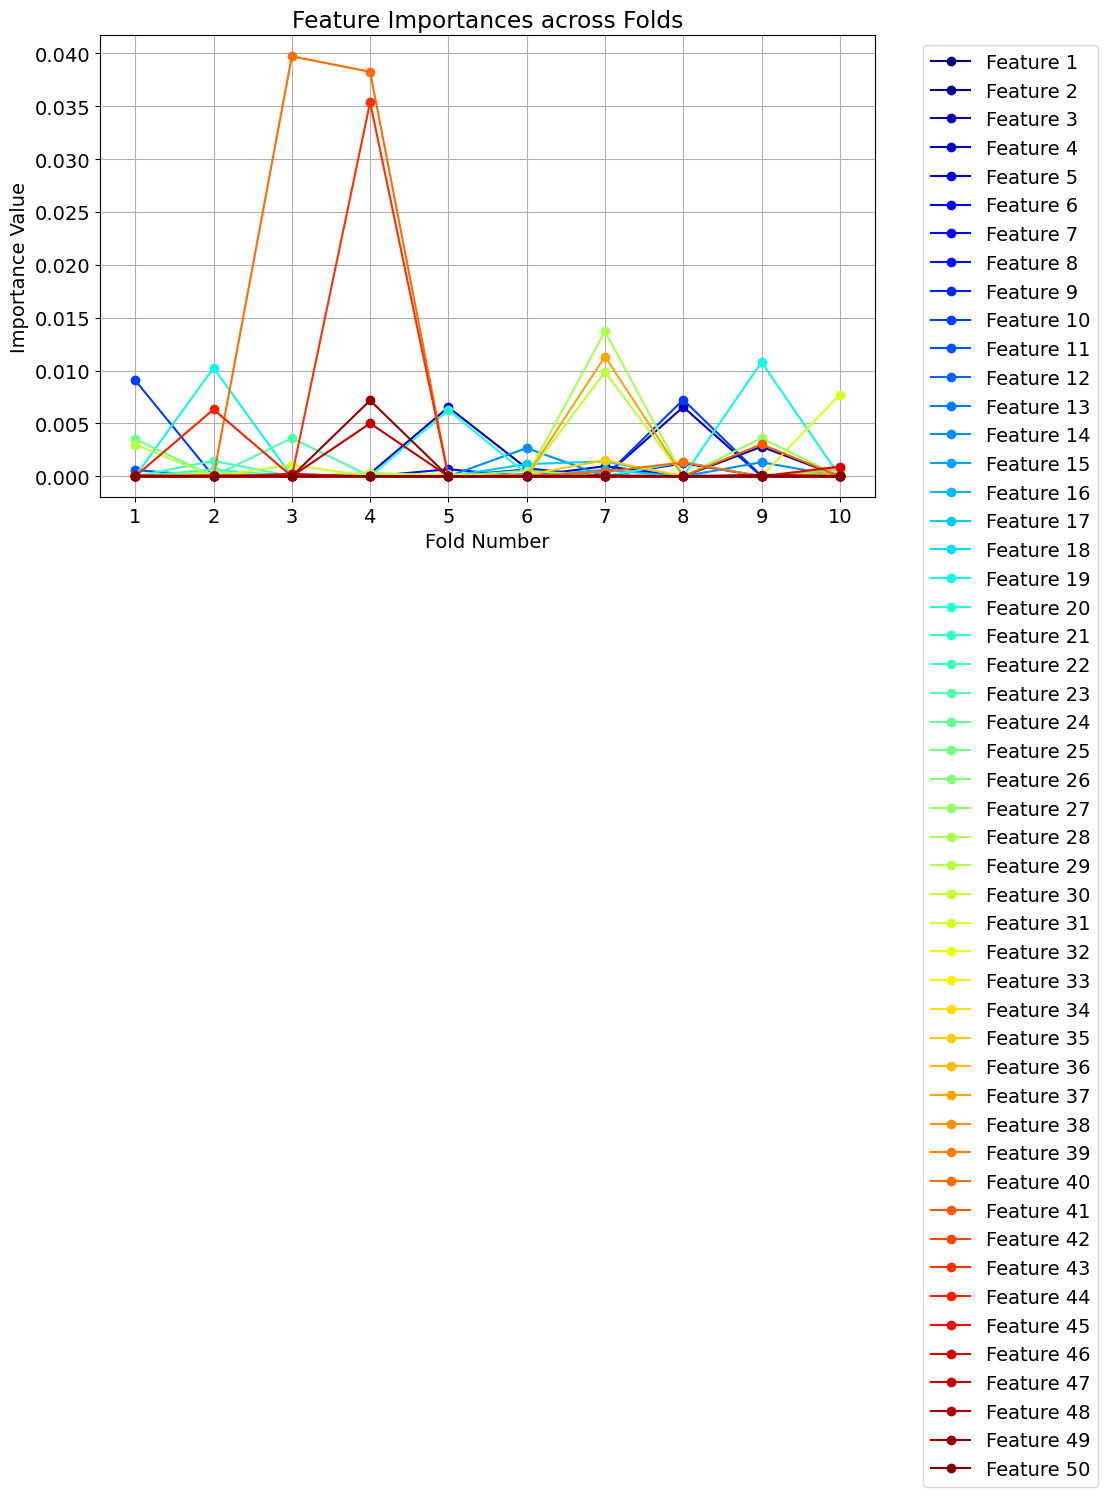

In [256]:
fimps = np.array(fimps)
sigs = fimps.shape[0]
folds = fimps.shape[1]
num_f = fimps.shape[2]
print(fimps.shape)

s = 4

colors = plt.cm.jet(np.linspace(0, 1, 50))

plt.figure(figsize=(10, 6))

for i in range(50):
    fimpacrossfolds = fimps[s,:,i]
    plt.plot(range(1, folds + 1), fimpacrossfolds, marker='o', color=colors[i], label=f'Feature {i+1}')

plt.xlabel('Fold Number')
plt.ylabel('Importance Value')
plt.title('Feature Importances across Folds')
plt.xticks(range(1, folds + 1))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.grid(True)
plt.show()

## Now we try to play with parameters max_depth, min_samples_split and min_samples_leaf to reduce overfitting. These parameters if not set, allow the RF Decision Trees to continue splitting until reaching purity.

In [264]:
import time

# Labels are stored in the variable 'labels'
# Rest of the data features are stored in 'X'
sigmas = 3
min_split = [10,20,40,50]
max_depths = [3,5,8,12]
n_estimators = 10
k = 4

start = time.time()

tr_errors = []
errors = []
times = []
fimps = []

for m in min_split:
    # print("sigma = ",sigma)
    print("min_samples_split = ",m)
    for d in max_depths:
        print("max_depth = ",d)
        rfgs = RandomForestRegressor(n_estimators=n_estimators,max_depth=d,min_samples_split=m)
        kf = KFold(n_splits=10, shuffle=True)

        fold_errors = []
        fold_tr_errors = []
        fold_fimps = []
        
        for train_index, val_index in kf.split(X_train1):
            X_train2, X_val2 = X_train1[train_index], X_train1[val_index]
            y_train2, y_val2 = y_train1[train_index], y_train1[val_index]

            X_aug4 = []
            y_aug4 = []

            X_aug4.append(X_train2)
            y_aug4.append(y_train2)

            for _ in range(k):
                noisex = np.random.normal(loc=0, scale=sigma, size=X_train2.shape)
                noisey = np.random.normal(loc=0, scale=sigma, size=y_train2.shape)
                X_aug4.append(X_train2 + noisex)
                y_aug4.append(y_train2 + noisey)

            X_aug4 = np.concatenate(X_aug4, axis=0)
            y_aug4 = np.concatenate(y_aug4, axis=0)
            
            rfgs.fit(X_aug4, y_aug4)

            # print(rfgs.feature_importances_)
            fold_fimps.append(rfgs.feature_importances_)

            print("Train error: ",mean_absolute_error(y_aug4, rfgs.predict(X_aug4)))
            fold_tr_errors.append(mean_absolute_error(y_aug4, rfgs.predict(X_aug4)))
            
            y_pred = rfgs.predict(X_val2)
            fold_error = mean_absolute_error(y_val2, y_pred)
            
            fold_errors.append(fold_error)
            print("Validation error: ",fold_error)

        for i, error in enumerate(fold_errors):
            print(f"Iteration {i+1}: Validation Error = {error}")

        avg_val_err = np.mean(fold_errors)
        print("Average validation error: ", avg_val_err)
        print("Median = ", np.median(fold_errors))
        end = time.time()
        print("Time: ",end-start)
        times.append(end-start)
        fimps.append(fold_fimps)
        errors.append((m,d,avg_val_err))
        tr_errors.append((m,d,np.mean(fold_tr_errors)))



min_samples_split =  10
max_depth =  3
Train error:  8.823357532366442
Validation error:  10.300259746126768
Train error:  8.841263828153192
Validation error:  9.766591515078229
Train error:  8.51451159094775
Validation error:  9.970458107590067
Train error:  8.453777536120482
Validation error:  9.078363375612296
Train error:  8.880649476657467
Validation error:  8.495372371428436
Train error:  8.344496083788144
Validation error:  13.917629835367045
Train error:  8.916056330199961
Validation error:  6.066616575390921
Train error:  8.265420613181366
Validation error:  11.445814289685119
Train error:  8.61384745580342
Validation error:  11.082453772336862
Train error:  8.53218094905148
Validation error:  10.961935888779093
Iteration 1: Validation Error = 10.300259746126768
Iteration 2: Validation Error = 9.766591515078229
Iteration 3: Validation Error = 9.970458107590067
Iteration 4: Validation Error = 9.078363375612296
Iteration 5: Validation Error = 8.495372371428436
Iteration 6: Valid

In [263]:
errors

[(10, 3, 10.058211480205411),
 (10, 5, 10.29630041950953),
 (10, 8, 10.060921847867213),
 (10, 12, 10.281937612921135),
 (20, 3, 10.207241280850312),
 (20, 5, 10.085054531707033),
 (20, 8, 10.226046712458606),
 (20, 12, 10.500655661122945),
 (40, 3, 10.11328214235266),
 (40, 5, 10.234693643210791),
 (40, 8, 10.301503816299062),
 (40, 12, 10.037984303403036),
 (50, 3, 9.90035965193405),
 (50, 5, 10.070546745640879),
 (50, 8, 10.616120091867796),
 (50, 12, 10.30033597359564)]

In [265]:
tr_errors

[(10, 3, 8.618556139626971),
 (10, 5, 6.731477858635867),
 (10, 8, 5.081527191698981),
 (10, 12, 4.806380726260778),
 (20, 3, 8.574351192110317),
 (20, 5, 6.94590919156784),
 (20, 8, 5.887001605353013),
 (20, 12, 5.873105116436852),
 (40, 3, 8.94417212048974),
 (40, 5, 7.741287063937614),
 (40, 8, 7.31581478645397),
 (40, 12, 7.317848240847026),
 (50, 3, 8.943055506714794),
 (50, 5, 7.98191398244803),
 (50, 8, 7.71979907950382),
 (50, 12, 7.621048812826537)]

## Inputs from the meeting
Original feature set: If I increase number of features, I can still keep the same model pipeline. I should defo try this anyway. And reducing complexity of the tree — do this for this set.
Graph feature set: If I’m doing GCN — let me just do that separately since it could lead to a good paper. Try this as an alternate pipeline to just see if it works.

- BrainAGE: You can compute the delta where the age of the person coming in is a given variable. It can be used to compute the predicted age (bias correction method)
- We are not aiming at 100% precise prediction (this way). 
- If we have enough data, and we have the right features, it should work the same way as the augmentation thing. That clearly worked showing that it was able to learn and classify similar feature sets to the same label. But it won’t work since similar ages really aren’t similar in features.
- Relative powers
- kNN was suggested

- Func conn on it's own use: choose a few frequencies rather than all 17.
- They have a lot more data, still got 8-9
- To write academically: 
- Check raw data vs centrality MAEs.
- Then see if it's scientifically explainable
- Relative power: old

Did basic till now, now I can do the actual scientific work -- explore features and see what makes more sense. 
- When you get old, a specific connection gets weaker
- Think of some insights: some theory of aging.
- Think about stuff and then code.
- Brainstorming together, talk to Raj
- Conceptually -- 

Write GitHub as if you're publishing it. Consistently. Polish over years to eventually have something to be published. Personal scientific diary. You will think of things on your own and continue the work.